In [1]:
import cv2
import matplotlib.pyplot as plt
import Aug

import pipe_example
import utils

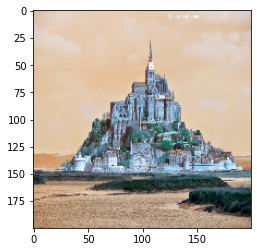

In [2]:
novas_imagens = 30
aux = cv2.imread('ibagem.jpg',cv2.IMREAD_COLOR)
#aux = cv2.imread('ibagem.jpg',cv2.IMREAD_GRAYSCALE)
img_array = cv2.resize(aux, (200, 200))
plt.imshow(img_array, cmap='gray')
plt.show()

In [3]:
pipe = pipe_example.pipe
pipe.print_pipe()

Operações:


In [4]:
for i in range( 13 ):
    pipe.remove()
pipe.print_pipe()

Operações:


Numero imagens - 30


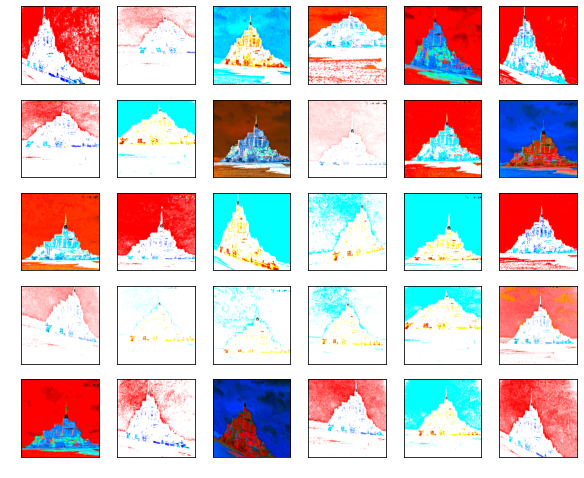

In [5]:
image = img_array
lista_de_imagens = []
lista_de_imagens = pipe.operar(image, vezes = novas_imagens)
utils.print_list_img(lista_de_imagens)

In [6]:
pipe.remove(1)
pipe.print_pipe()

Operações:


In [7]:
pipe.replace(0, Aug.Contrast(prob=0.9, min_factor=-5, max_factor=5) )
pipe.replace(1, Aug.Flip(prob=0.5))
pipe.add(Aug.Zoom_Random(prob=0.5, percentage_area=0.5, randomise=True))
pipe.print_pipe()

Operações:


Numero imagens - 30


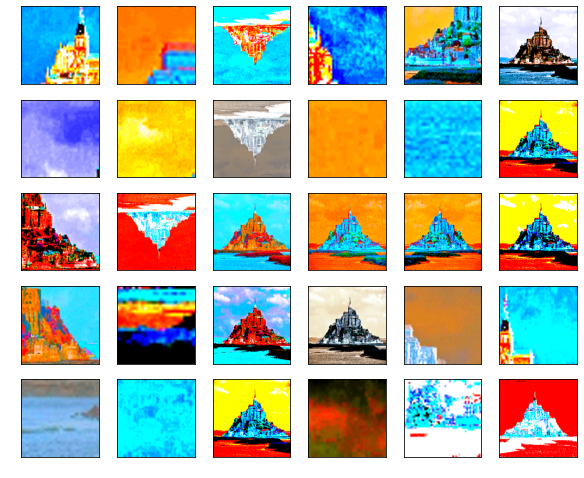

In [8]:
lista_de_imagens = []
lista_de_imagens = pipe.operar(image, vezes = novas_imagens)
utils.print_list_img(lista_de_imagens)